In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
import os

# Path to the folder containing "alzheimers_images"
folder_path = "/content/drive/My Drive/"


# List contents of "alzheimers_images" folder
alzheimers_folder_path = os.path.join(folder_path, "alzheimers_images", 'Alzheimer_s Dataset')
print(os.listdir(alzheimers_folder_path))

['test', 'train']


In [4]:
test_path = os.path.join(alzheimers_folder_path, "test/")
print(os.listdir(test_path))

['VeryMildDemented', 'NonDemented', 'ModerateDemented', 'MildDemented']


In [5]:
train_path = os.path.join(alzheimers_folder_path, "train/")
print(os.listdir(train_path))

['NonDemented', 'ModerateDemented', 'MildDemented', 'VeryMildDemented']


In [6]:
print("Train set counts:")
print("MildDemented images:", len(os.listdir(train_path + 'MildDemented')))
print("ModerateDemented images:", len(os.listdir(train_path + 'ModerateDemented')))
print("NonDemented images:", len(os.listdir(train_path + 'NonDemented')))
print("VeryMildDemented images:", len(os.listdir(train_path + 'VeryMildDemented')))
print("\nTest set counts:")
print("MildDemented images:", len(os.listdir(test_path + 'MildDemented')))
print("ModerateDemented images:", len(os.listdir(test_path + 'ModerateDemented')))
print("NonDemented images:", len(os.listdir(test_path + 'NonDemented')))
print("VeryMildDemented images:", len(os.listdir(test_path + 'VeryMildDemented')))

Train set counts:
MildDemented images: 717
ModerateDemented images: 52
NonDemented images: 2560
VeryMildDemented images: 1792

Test set counts:
MildDemented images: 169
ModerateDemented images: 12
NonDemented images: 640
VeryMildDemented images: 448


In [7]:
os.listdir(train_path + 'VeryMildDemented')[0]

'verymildDem1692.jpg'

In [8]:
vmd_img = train_path + 'VeryMildDemented/'+'verymildDem1283.jpg'

In [9]:
imread(vmd_img).shape

(208, 176)

In [10]:
vmd_image_array = imread(vmd_img)

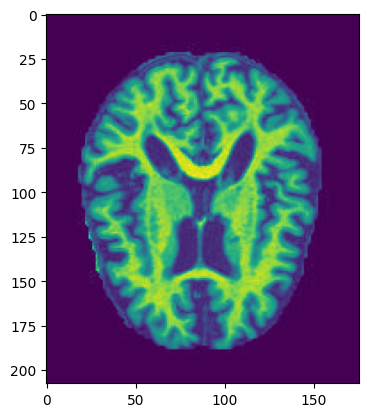

In [11]:
plt.imshow(vmd_image_array)

In [12]:
# Function to normalize and reshape images
def preprocess_images(folder_path, x, y):
    classes = os.listdir(folder_path)
    for class_name in classes:
        class_path = os.path.join(folder_path, class_name)
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            # Load the image
            image = imread(image_path)
            # Convert to (208,176,1) from (208,176,1)
            image = np.expand_dims(image, axis=-1)
            # Normalize pixel values
            image = image / 255.0
            # Store the preprocessed image
            x.append(image)
            # Store the label
            y.append(class_name)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_path = "/content/drive/My Drive/alzheimers_images/Alzheimer_s Dataset/train"
test_path = "/content/drive/My Drive/alzheimers_images/Alzheimer_s Dataset/test"

# Lists to store preprocessed images and labels
x_train = []
y_train = []
x_test = []
y_test = []

preprocess_images(train_path, x_train, y_train)
preprocess_images(test_path, x_test, y_test)

# Convert lists to numpy arrays
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [15]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [16]:
# Print shapes of the data arrays
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (4096, 208, 176, 1)
y_train shape: (4096,)
x_val shape: (1025, 208, 176, 1)
y_val shape: (1025,)
x_test shape: (1269, 208, 176, 1)
y_test shape: (1269,)


In [17]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [18]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the string labels to integer labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Display the mapping between original labels and encoded categories
label_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
print("Label mapping:")
for index, label in label_mapping.items():
    print(f"{index}: {label}")

# Now, convert the integer labels to categorical format
y_cat_train = to_categorical(y_train_encoded, num_classes=4)
y_cat_test = to_categorical(y_test_encoded, num_classes=4)

Label mapping:
0: MildDemented
1: ModerateDemented
2: NonDemented
3: VeryMildDemented


In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# CNN architecture
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(208, 176, 1)),
    MaxPooling2D(pool_size=(2, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(1, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 206, 174, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 103, 174, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 101, 172, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 101, 86, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 99, 84, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 49, 42, 64)        0

In [20]:
from keras.callbacks import EarlyStopping

In [21]:
#Implenebt early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2, verbose=1, mode='min', restore_best_weights=True)
callbacks = [early_stopping]

In [22]:
model.fit(x_train, y_cat_train, epochs=50, batch_size=16, validation_data=(x_test , y_cat_test), callbacks=callbacks)

Epoch 1/50
256/256 [==============================] - 364s 1s/step - loss: 1.0310 - accuracy: 0.5154 - val_loss: 0.9441 - val_accuracy: 0.5579
Epoch 2/50
256/256 [==============================] - 372s 1s/step - loss: 0.7053 - accuracy: 0.6836 - val_loss: 1.1721 - val_accuracy: 0.5343
Epoch 3/50
256/256 [==============================] - 383s 1s/step - loss: 0.3673 - accuracy: 0.8484 - val_loss: 1.6925 - val_accuracy: 0.5776
Epoch 3: early stopping


In [23]:
model.metrics_names

['loss', 'accuracy']

In [24]:
import pandas as pd

In [25]:
metrics = pd.DataFrame(model.history.history)

<Axes: >

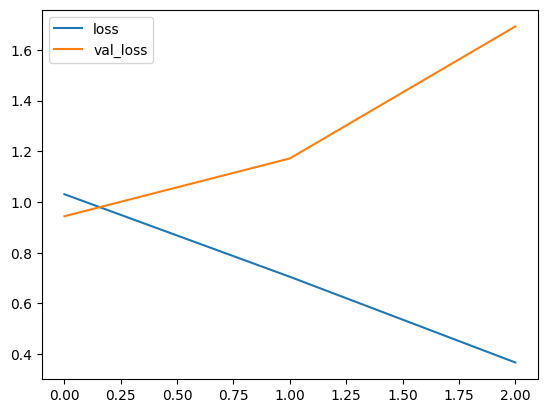

In [26]:
metrics[['loss','val_loss']].plot()

<Axes: >

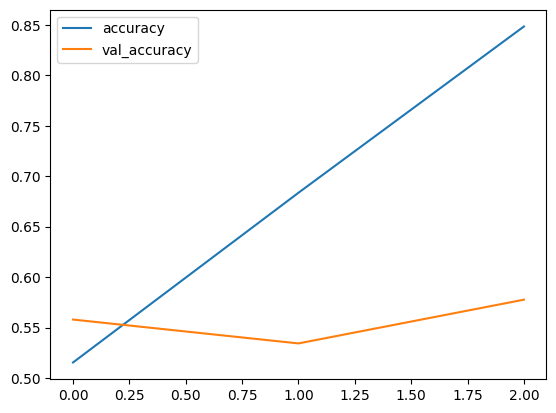

In [27]:
metrics[['accuracy','val_accuracy']].plot()

In [28]:
from sklearn.metrics import classification_report

In [29]:
predictions = model.predict(x_test)

40/40 [==============================] - 27s 608ms/step


In [30]:
predicted_classes = np.argmax(predictions, axis=1)
print(predicted_classes) #We saw previously, this first image is Very Mild Demented, which is predicted correctly in the below output

[3 3 2 ... 2 2 2]


In [31]:
# Convert probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Map class labels back to their original values
class_labels = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
predicted_labels = [class_labels[i] for i in predicted_classes]

# Print predicted classes and their corresponding labels
for i, label in enumerate(predicted_labels):
  print(f"Predicted class: {label}, Predicted value: {predicted_classes[i]}")

Predicted class: VeryMildDemented, Predicted value: 3
Predicted class: VeryMildDemented, Predicted value: 3
Predicted class: NonDemented, Predicted value: 2
Predicted class: NonDemented, Predicted value: 2
Predicted class: NonDemented, Predicted value: 2
Predicted class: NonDemented, Predicted value: 2
Predicted class: NonDemented, Predicted value: 2
Predicted class: NonDemented, Predicted value: 2
Predicted class: NonDemented, Predicted value: 2
Predicted class: NonDemented, Predicted value: 2
Predicted class: VeryMildDemented, Predicted value: 3
Predicted class: VeryMildDemented, Predicted value: 3
Predicted class: NonDemented, Predicted value: 2
Predicted class: NonDemented, Predicted value: 2
Predicted class: NonDemented, Predicted value: 2
Predicted class: VeryMildDemented, Predicted value: 3
Predicted class: VeryMildDemented, Predicted value: 3
Predicted class: VeryMildDemented, Predicted value: 3
Predicted class: NonDemented, Predicted value: 2
Predicted class: NonDemented, Pred

In [32]:
print(classification_report(y_test,predicted_labels))

                  precision    recall  f1-score   support

    MildDemented       0.00      0.00      0.00       169
ModerateDemented       0.00      0.00      0.00        12
     NonDemented       0.56      0.93      0.70       640
VeryMildDemented       0.56      0.25      0.35       448

        accuracy                           0.56      1269
       macro avg       0.28      0.30      0.26      1269
    weighted avg       0.48      0.56      0.47      1269



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(y_test, predicted_labels) #Due to a much larger amount of images of Non Demented, and Very Mild Demented classes, they are disproportionately predicted by the model

array([[  0,   0, 131,  38],
       [  0,   0,   5,   7],
       [  0,   0, 594,  46],
       [  0,   0, 334, 114]])